<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/Passing_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install git+https://github.com/statsbomb/statsbombpy.git;

  Cloning https://github.com/statsbomb/statsbombpy.git to /tmp/pip-req-build-q7h7vf6n
  Running command git clone -q https://github.com/statsbomb/statsbombpy.git /tmp/pip-req-build-q7h7vf6n
     |████████████████████████████████| 143kB 5.1MB/s 
     |████████████████████████████████| 245kB 7.0MB/s 
  Created wheel for statsbombpy: filename=statsbombpy-1.0-cp37-none-any.whl size=10764 sha256=f16b17c5c1bf08965debba6bff6be60d6d8734f037e0cfb9326112e1154ec1d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-ykc60hpm/wheels/9f/02/d9/e55fe4d1650a0dd0ad7103b1766b971a167115c44ba5dba8fe
  Created wheel for cashier: filename=cashier-1.3-py2.py3-none-any.whl size=3233 sha256=d9fd762683d64e154244dcc2fd5395940a263fcdcb6e8a174239ea86c861fb64
  Stored in directory: /root/.cache/pip/wheels/3e/69/ef/8607bf56b62fe4eed1a4811dbd6a9fd15dec82bcb42d737056
Successfully built statsbombpy cashier
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR

In [3]:
from statsbombpy import sb

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import json
import seaborn as sns
import pickle
import networkx as nx

In [5]:
competitions=sb.competitions()

credentials were not supplied. open data access only


In [6]:
competitions

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-10-25T12:33:27.855343,2020-10-25T12:33:27.855343
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [7]:
sb.matches(competition_id=11,season_id=42)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,303421,2020-07-19,17:00:00.000,Spain - La Liga,2019/2020,Deportivo Alavés,Barcelona,0,5,available,2020-07-29T05:00,38,Regular Season,Estadio de Mendizorroza,J. Martínez,1.1.0,2,2
1,303493,2020-06-23,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Athletic Bilbao,1,0,available,2020-07-29T05:00,31,Regular Season,Camp Nou,Jesús Gil,1.1.0,2,2
2,303516,2020-06-27,17:00:00.000,Spain - La Liga,2019/2020,Celta Vigo,Barcelona,2,2,available,2020-07-29T05:00,32,Regular Season,Abanca-Balaídos,G. Cuadra,1.1.0,2,2
3,303680,2020-07-11,19:30:00.000,Spain - La Liga,2019/2020,Real Valladolid,Barcelona,0,1,available,2020-12-18T12:10:38.985394,36,Regular Season,Estadio Municipal José Zorrilla,Antonio Mateu,1.1.0,2,2
4,303532,2020-06-16,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Leganés,2,0,available,2020-07-29T05:00,29,Regular Season,Camp Nou,J. Martínez,1.1.0,2,2
5,303400,2020-01-25,16:00:00.000,Spain - La Liga,2019/2020,Valencia,Barcelona,2,0,available,2020-07-29T05:00,21,Regular Season,Estadio de Mestalla,Jesús Gil,1.1.0,2,2
6,303634,2020-07-16,21:00:00.000,Spain - La Liga,2019/2020,Barcelona,Osasuna,1,2,available,2020-09-18T13:16:12.825671,37,Regular Season,Camp Nou,J. Sánchez,1.1.0,2,2
7,303479,2020-03-07,18:30:00.000,Spain - La Liga,2019/2020,Barcelona,Real Sociedad,1,0,available,2020-07-29T05:00,27,Regular Season,Camp Nou,J. Martínez,1.1.0,2,2
8,303615,2020-07-08,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Espanyol,1,0,available,2020-09-11T23:12:41.238499,35,Regular Season,Camp Nou,J. Munuera,1.1.0,2,2
9,303696,2020-06-30,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Atlético Madrid,2,2,available,2020-07-29T05:00,33,Regular Season,Camp Nou,A. Hernández,1.1.0,2,2


In [8]:
match_ids=np.array(sb.matches(competition_id=11,season_id=42)["match_id"])

credentials were not supplied. open data access only


In [9]:
match_ids

array([303421, 303493, 303516, 303680, 303532, 303400, 303634, 303479,
       303615, 303696, 303664, 303596, 303487, 303600, 303548, 303473,
       303610, 303652, 303430, 303674, 303470, 303700, 303707, 303666,
       303725, 303504, 303715, 303377, 303524, 303451, 303517, 303682,
       303731])

In [10]:
data=sb.events(match_id=match_ids[0])

credentials were not supplied. open data access only


In [11]:

data.columns

Index(['ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'carry_end_location', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_l

In [33]:
x=data[data['possession_team']=="Barcelona"][["player","pass_angle","pass_end_location","location","pass_length","duration","pass_recipient"]].dropna()

,player,pass_angle,pass_end_location,location,pass_length,duration,pass_recipient
6,Luis Alberto Suárez Díaz,3.099950,"[43.2, 40.7]","[60.0, 40.0]",16.814577,1.235451,Sergio Busquets i Burgos
7,Sergio Busquets i Burgos,-2.258941,"[36.4, 31.4]","[43.8, 40.4]",11.651609,1.656018,Clément Lenglet
8,Clément Lenglet,1.712693,"[34.5, 39.1]","[35.6, 31.4]",7.778174,1.512557,Sergio Busquets i Burgos
9,Sergio Busquets i Burgos,-1.513268,"[41.9, 20.7]","[40.8, 39.8]",19.131649,1.107334,Clément Lenglet
10,Clément Lenglet,1.274681,"[51.0, 26.5]","[49.2, 20.6]",6.168468,0.980784,Ricard Puig Martí
...,...,...,...,...,...,...,...
1163,Lionel Andrés Messi Cuccittini,-0.337456,"[103.8, 36.3]","[92.4, 40.3]",12.081390,0.752965,Martin Braithwaite Christensen
1164,Roberto Jiménez Gago,0.308376,"[86.5, 60.8]","[9.9, 36.4]",80.392290,3.404587,José Luis Sanmartín Mato
1165,Arturo Erasmo Vidal Pardo,-1.386853,"[31.3, 21.2]","[30.5, 25.5]",4.373786,1.238640,Jordi Alba Ramos
1166,Jordi Alba Ramos,0.943488,"[40.5, 32.1]","[31.8, 20.1]",14.821943,1.529177,Frenkie de Jong


In [34]:
n=nx.MultiDiGraph()
n.add_edges_from(list(tuple(zip(x["player"],x["pass_recipient"]))))

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 3,
 2,
 2,
 1,
 0,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 3,
 2,
 0,
 1,
 3,
 0,
 1,
 3,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 0,
 0,
 1,
 3,
 0,
 1,
 1,
 1,
 4,
 4,
 3,
 3,
 4,
 1,
 2,
 2,
 0,
 0,
 4,
 4,
 4,
 5,
 5,
 5,
 2,
 4,
 2,
 2,
 3,
 3,
 0,
 0,
 0,
 2,
 1,
 0,
 4,
 2,
 6,
 6,
 4,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 5,
 5,
 6,
 0,
 0,
 2,
 2,
 7,
 3,
 0,
 4,
 5,
 5,
 3,
 7,
 8,
 5,
 4,
 1,
 4,
 4,
 6,
 5,
 5,
 7,
 6,
 8,
 7,
 6,
 6,
 3,
 3,
 2,
 4,
 3,
 1,
 0,
 1,
 6,
 1,
 0,
 0,
 3,
 7,
 6,
 8,
 9,
 0,
 1,
 2,
 2,
 0,
 0,
 8,
 3,
 4,
 3,
 1,
 4,
 10,
 6,
 11,
 7,
 0,
 7,
 3,
 8,
 1,
 1,
 7,
 0,
 1,
 7,
 3,
 9,
 2,
 8

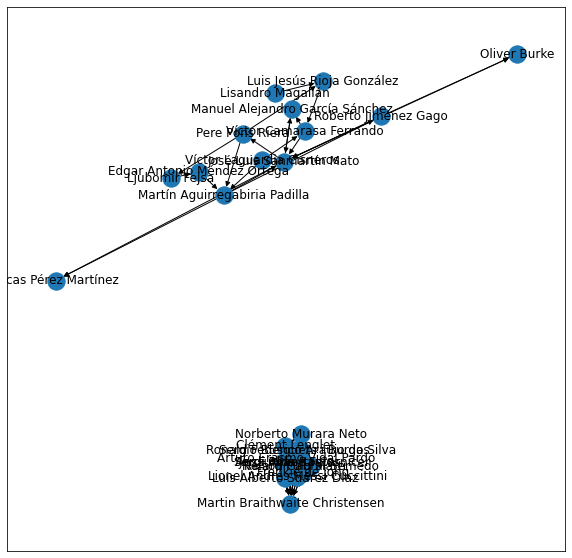

In [35]:
plt.figure(figsize=(10,10))
nx.draw_networkx(n)

In [36]:
list(tuple(zip(x["player"],x["pass_recipient"])))

[('Luis Alberto Suárez Díaz', 'Sergio Busquets i Burgos'),
 ('Sergio Busquets i Burgos', 'Clément Lenglet'),
 ('Clément Lenglet', 'Sergio Busquets i Burgos'),
 ('Sergio Busquets i Burgos', 'Clément Lenglet'),
 ('Clément Lenglet', 'Ricard Puig Martí'),
 ('Ricard Puig Martí', 'Sergio Busquets i Burgos'),
 ('Sergio Busquets i Burgos', 'Ronald Federico Araújo da Silva'),
 ('Ronald Federico Araújo da Silva', 'Sergio Busquets i Burgos'),
 ('Sergio Busquets i Burgos', 'Ricard Puig Martí'),
 ('Ricard Puig Martí', 'Jordi Alba Ramos'),
 ('Jordi Alba Ramos', 'Arturo Erasmo Vidal Pardo'),
 ('Arturo Erasmo Vidal Pardo', 'Sergio Busquets i Burgos'),
 ('Sergio Busquets i Burgos', 'Sergi Roberto Carnicer'),
 ('Sergi Roberto Carnicer', 'Lionel Andrés Messi Cuccittini'),
 ('Lionel Andrés Messi Cuccittini', 'Sergi Roberto Carnicer'),
 ('Manuel Alejandro García Sánchez', 'José Luis Sanmartín Mato'),
 ('José Luis Sanmartín Mato', 'Lucas Pérez Martínez'),
 ('Clément Lenglet', 'Norberto Murara Neto'),
 ('Nor

In [37]:
n.nodes()

NodeView(('Luis Alberto Suárez Díaz', 'Sergio Busquets i Burgos', 'Clément Lenglet', 'Ricard Puig Martí', 'Ronald Federico Araújo da Silva', 'Jordi Alba Ramos', 'Arturo Erasmo Vidal Pardo', 'Sergi Roberto Carnicer', 'Lionel Andrés Messi Cuccittini', 'Manuel Alejandro García Sánchez', 'José Luis Sanmartín Mato', 'Lucas Pérez Martínez', 'Norberto Murara Neto', 'Anssumane Fati', 'Edgar Antonio Méndez Ortega', 'Martín Aguirregabiria Padilla', 'Oliver Burke', 'Roberto Jiménez Gago', 'Víctor Laguardia Cisneros', 'Víctor Camarasa Ferrando', 'Lisandro Magallán', 'Luis Jesús Rioja González', 'Nélson Cabral Semedo', 'Frenkie de Jong', 'Martin Braithwaite Christensen', 'Pere Pons Riera', 'Ljubomir Fejsa'))

In [42]:
n.remove_nodes_from(['Pere Pons Riera', 'Ljubomir Fejsa', 'Víctor Camarasa Ferrando', 'Lisandro Magallán', 'Luis Jesús Rioja González', 'Roberto Jiménez Gago', 'Víctor Laguardia Cisneros', 'Víctor Camarasa Ferrando', 'Lisandro Magallán', 'Manuel Alejandro García Sánchez', 'José Luis Sanmartín Mato', 'Lucas Pérez Martínez','Edgar Antonio Méndez Ortega', 'Martín Aguirregabiria Padilla', 'Oliver Burke'])

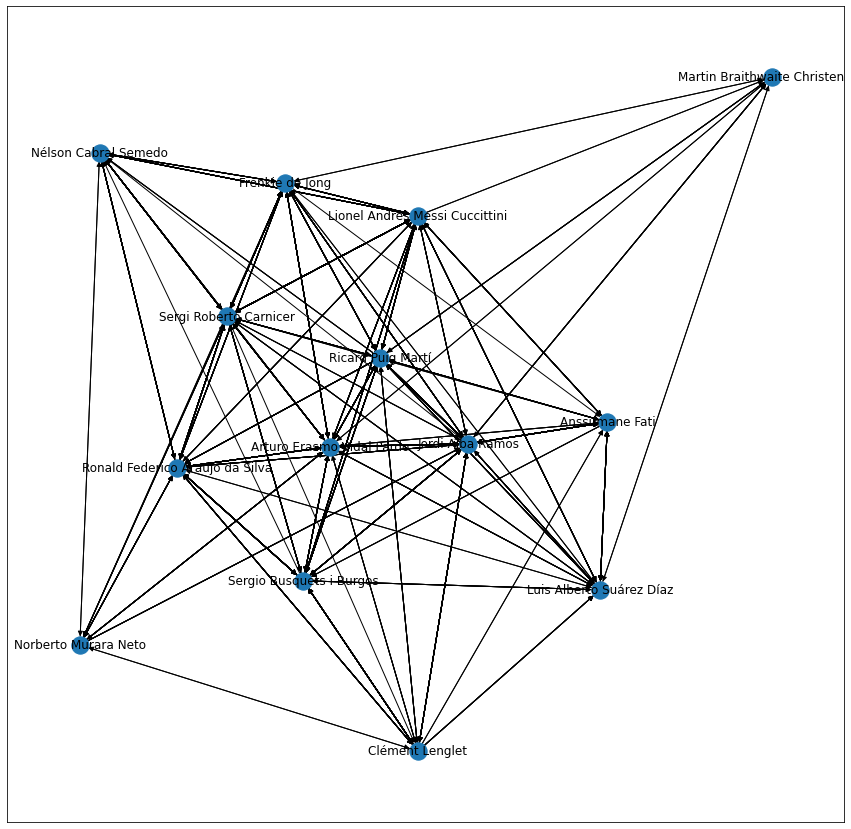

In [44]:
plt.figure(figsize=(15,15))
nx.draw_networkx(n)

In [62]:
for i in set(n.edges()):

SyntaxError: ignored